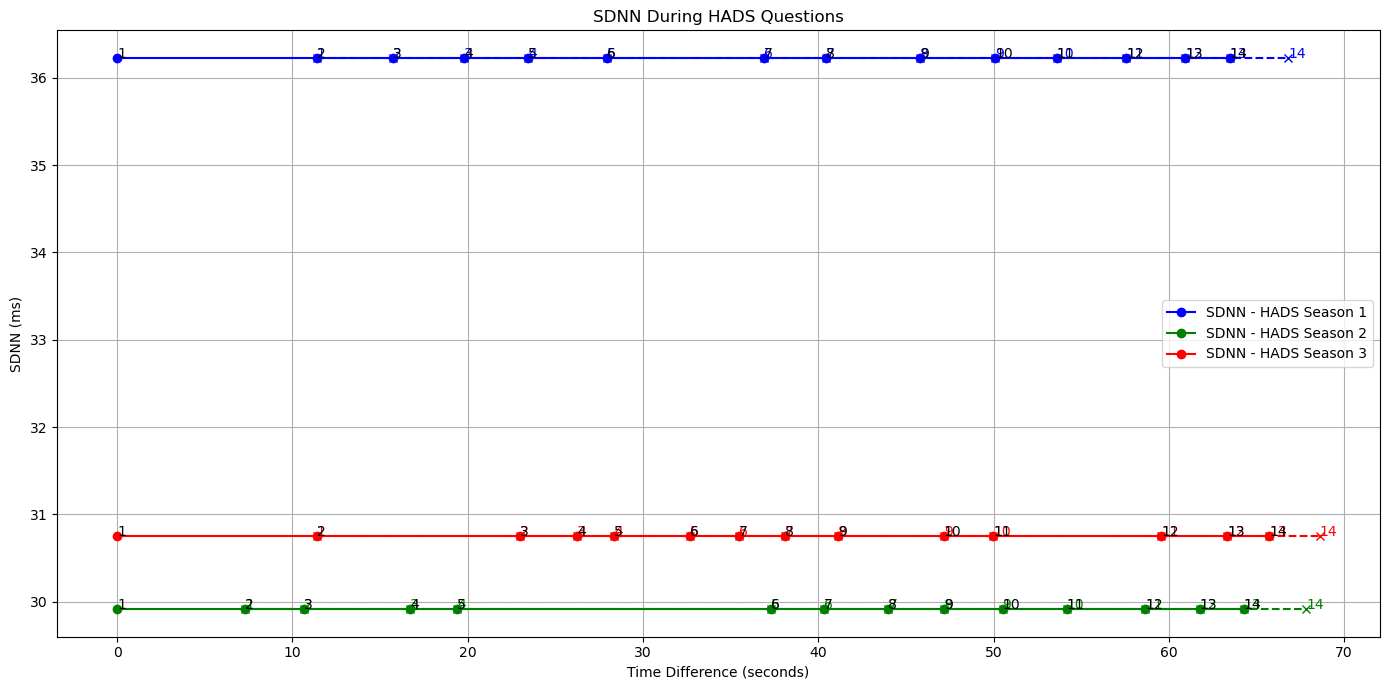

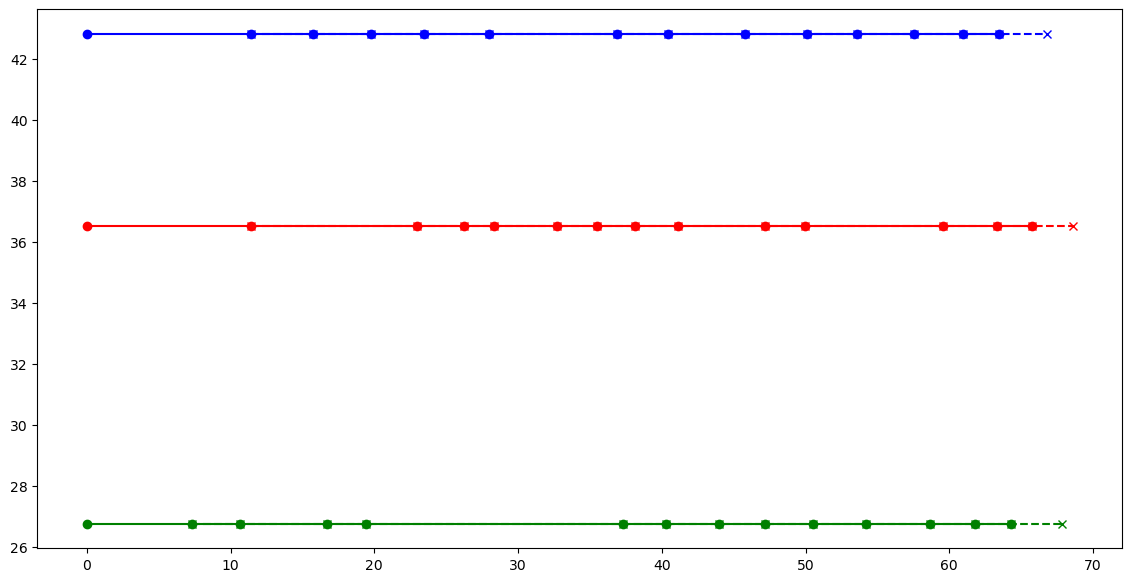

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the HRV data for three seasons
hrv_01 = pd.read_csv('/Users/urmebose/Desktop/DM/hrv_01.csv')
hrv_02 = pd.read_csv('/Users/urmebose/Desktop/DM/hrv_02.csv')
hrv_03 = pd.read_csv('/Users/urmebose/Desktop/DM/hrv_03.csv')
psychometric_01 = pd.read_csv('/Users/urmebose/Desktop/DM/Psychometric_Test_Results_01.csv')
psychometric_02 = pd.read_csv('/Users/urmebose/Desktop/DM/Psychometric_Test_Results_02.csv')
psychometric_03 = pd.read_csv('/Users/urmebose/Desktop/DM/Psychometric_Test_Results_03.csv')

# Clean and prepare the psychometric data
# Rename columns for easier access
psychometric_01.columns = ['Type', 'Test', 'Question', 'Answer', 'Time(s)', 'Question Start Time', 'Question Answer Time']
psychometric_02.columns = ['Type', 'Test', 'Question', 'Answer', 'Time(s)', 'Question Start Time', 'Question Answer Time']
psychometric_03.columns = ['Type', 'Test', 'Question', 'Answer', 'Time(s)', 'Question Start Time', 'Question Answer Time']

# Convert 'datetime' columns to datetime format and ensure they are tz-naive
hrv_01['datetime'] = pd.to_datetime(hrv_01['datetime']).dt.tz_localize(None)
hrv_02['datetime'] = pd.to_datetime(hrv_02['datetime']).dt.tz_localize(None)
hrv_03['datetime'] = pd.to_datetime(hrv_03['datetime']).dt.tz_localize(None)
psychometric_01['Question Start Time'] = pd.to_datetime(psychometric_01['Question Start Time']).dt.tz_localize(None)
psychometric_02['Question Start Time'] = pd.to_datetime(psychometric_02['Question Start Time']).dt.tz_localize(None)
psychometric_03['Question Start Time'] = pd.to_datetime(psychometric_03['Question Start Time']).dt.tz_localize(None)
psychometric_01['Question Answer Time'] = pd.to_datetime(psychometric_01['Question Answer Time']).dt.tz_localize(None)
psychometric_02['Question Answer Time'] = pd.to_datetime(psychometric_02['Question Answer Time']).dt.tz_localize(None)
psychometric_03['Question Answer Time'] = pd.to_datetime(psychometric_03['Question Answer Time']).dt.tz_localize(None)

# Define the question type to analyze (e.g., HADS)
question_type = 'HADS'

# Filter psychometric data by the chosen question type
data_01 = psychometric_01[psychometric_01['Type'] == question_type].reset_index(drop=True)
data_02 = psychometric_02[psychometric_02['Type'] == question_type].reset_index(drop=True)
data_03 = psychometric_03[psychometric_03['Type'] == question_type].reset_index(drop=True)

# Merge the psychometric data with HRV data based on the closest timestamp
data_01['closest_sdnn'] = data_01['Question Start Time'].apply(
    lambda x: hrv_01.iloc[(hrv_01['datetime'] - x).abs().argsort()[:1]]['sdnn'].values[0])
data_01['closest_rmssd'] = data_01['Question Start Time'].apply(
    lambda x: hrv_01.iloc[(hrv_01['datetime'] - x).abs().argsort()[:1]]['rmssd'].values[0])
data_02['closest_sdnn'] = data_02['Question Start Time'].apply(
    lambda x: hrv_02.iloc[(hrv_02['datetime'] - x).abs().argsort()[:1]]['sdnn'].values[0])
data_02['closest_rmssd'] = data_02['Question Start Time'].apply(
    lambda x: hrv_02.iloc[(hrv_02['datetime'] - x).abs().argsort()[:1]]['rmssd'].values[0])
data_03['closest_sdnn'] = data_03['Question Start Time'].apply(
    lambda x: hrv_03.iloc[(hrv_03['datetime'] - x).abs().argsort()[:1]]['sdnn'].values[0])
data_03['closest_rmssd'] = data_03['Question Start Time'].apply(
    lambda x: hrv_03.iloc[(hrv_03['datetime'] - x).abs().argsort()[:1]]['rmssd'].values[0])

# Extract question numbers
data_01['Question Number'] = data_01['Test'].str.extract(r'(\d+)').astype(int)
data_02['Question Number'] = data_02['Test'].str.extract(r'(\d+)').astype(int)
data_03['Question Number'] = data_03['Test'].str.extract(r'(\d+)').astype(int)

# Create time difference for start and answer times
data_01['Start Time Difference'] = (data_01['Question Start Time'] - data_01['Question Start Time'].min()).dt.total_seconds()
data_01['Answer Time Difference'] = (data_01['Question Answer Time'] - data_01['Question Start Time'].min()).dt.total_seconds()
data_02['Start Time Difference'] = (data_02['Question Start Time'] - data_02['Question Start Time'].min()).dt.total_seconds()
data_02['Answer Time Difference'] = (data_02['Question Answer Time'] - data_02['Question Start Time'].min()).dt.total_seconds()
data_03['Start Time Difference'] = (data_03['Question Start Time'] - data_03['Question Start Time'].min()).dt.total_seconds()
data_03['Answer Time Difference'] = (data_03['Question Answer Time'] - data_03['Question Start Time'].min()).dt.total_seconds()

# Plot the data for SDNN with start and answer times
plt.figure(figsize=(14, 7))
plt.plot(data_01['Start Time Difference'], data_01['closest_sdnn'], label=f'SDNN - {question_type} Season 1', marker='o', color='b')
plt.plot(data_01['Answer Time Difference'], data_01['closest_sdnn'], linestyle='--', marker='x', color='b')
plt.plot(data_02['Start Time Difference'], data_02['closest_sdnn'], label=f'SDNN - {question_type} Season 2', marker='o', color='g')
plt.plot(data_02['Answer Time Difference'], data_02['closest_sdnn'], linestyle='--', marker='x', color='g')
plt.plot(data_03['Start Time Difference'], data_03['closest_sdnn'], label=f'SDNN - {question_type} Season 3', marker='o', color='r')
plt.plot(data_03['Answer Time Difference'], data_03['closest_sdnn'], linestyle='--', marker='x', color='r')

# Annotate the questions for SDNN
for i in range(len(data_01)):
    plt.annotate(data_01['Question Number'][i].item(), (data_01['Start Time Difference'][i], data_01['closest_sdnn'][i]))
    plt.annotate(data_01['Question Number'][i].item(), (data_01['Answer Time Difference'][i], data_01['closest_sdnn'][i]), color='b')

for i in range(len(data_02)):
    plt.annotate(data_02['Question Number'][i].item(), (data_02['Start Time Difference'][i], data_02['closest_sdnn'][i]))
    plt.annotate(data_02['Question Number'][i].item(), (data_02['Answer Time Difference'][i], data_02['closest_sdnn'][i]), color='g')

for i in range(len(data_03)):
    plt.annotate(data_03['Question Number'][i].item(), (data_03['Start Time Difference'][i], data_03['closest_sdnn'][i]))
    plt.annotate(data_03['Question Number'][i].item(), (data_03['Answer Time Difference'][i], data_03['closest_sdnn'][i]), color='r')

plt.title(f'SDNN During {question_type} Questions')
plt.xlabel('Time Difference (seconds)')
plt.ylabel('SDNN (ms)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the data for RMSSD with start and answer times
plt.figure(figsize=(14, 7))
plt.plot(data_01['Start Time Difference'], data_01['closest_rmssd'], label=f'RMSSD - {question_type} Season 1', marker='o', color='b')
plt.plot(data_01['Answer Time Difference'], data_01['closest_rmssd'], linestyle='--', marker='x', color='b')
plt.plot(data_02['Start Time Difference'], data_02['closest_rmssd'], label=f'RMSSD - {question_type} Season 2', marker='o', color='g')
plt.plot(data_02['Answer Time Difference'], data_02['closest_rmssd'], linestyle='--', marker='x', color='g')
plt.plot(data_03['Start Time Difference'], data_03['closest_rmssd'], label=f'RMSSD - {question_type} Season 3', marker='o', color='r')
plt.plot(data_03['Answer Time Difference'], data_03['closest_rmssd'], linestyle='--', marker='x', color='r')